In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
question = pd.read_csv('data/SurveySchema.csv')
question.shape
question.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
question.tail()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
7,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10,If Which of the following cloud computing serv...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,If On which online platforms have you begun or...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
question = pd.read_csv('data/schema.csv')
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

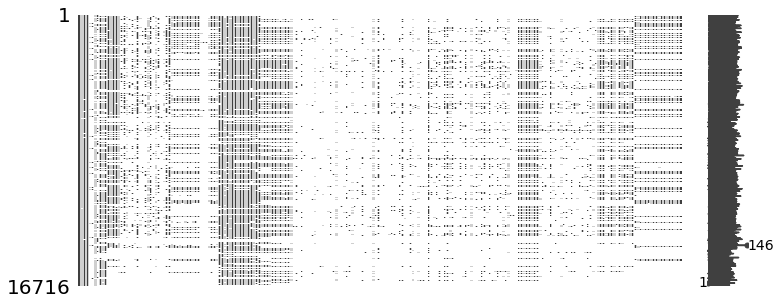

In [21]:
# NaN 시각화
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

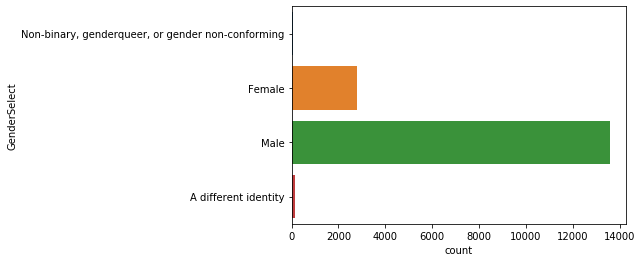

In [8]:
sns.countplot(y='GenderSelect', data =mcq)

In [10]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())

#'country' 칼럼을 인덱스로 지정
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명 지정
con_df.columns = ['응답수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
mcq['Country'].describe

<bound method NDFrame.describe of 0                  NaN
1        United States
2               Canada
3        United States
4               Taiwan
             ...      
16711            Other
16712        Indonesia
16713           Taiwan
16714        Singapore
16715            Japan
Name: Country, Length: 16716, dtype: object>

In [12]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [13]:
con_df = pd.DataFrame(mcq['Age'].value_counts())

con_df['나이'] = con_df.index

con_df.columns = ['인원', '나이']

con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,인원,나이
0,969,25.0
1,898,24.0
2,886,26.0
3,842,27.0
4,839,23.0
5,778,30.0
6,761,28.0
7,731,29.0
8,694,22.0
9,597,31.0


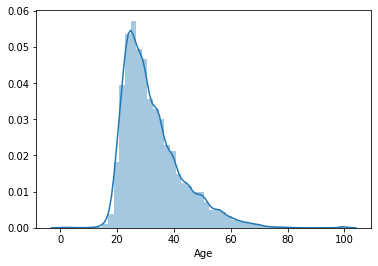

In [14]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

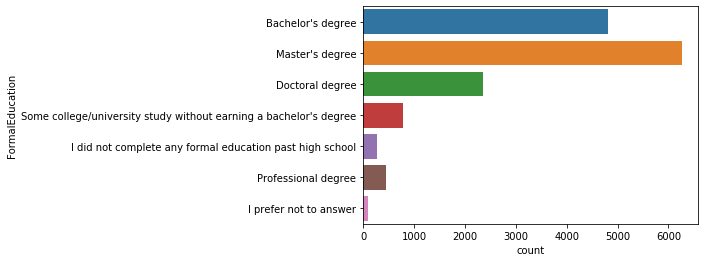

In [15]:
sns.countplot(y='FormalEducation', data=mcq)

In [20]:
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


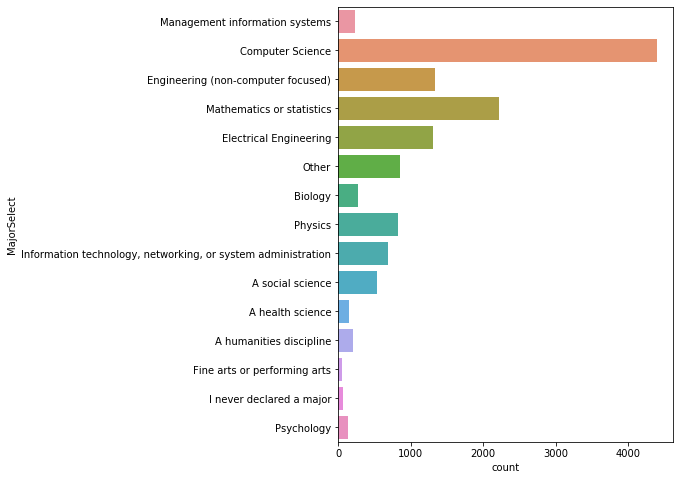

In [25]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data = mcq)

In [26]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


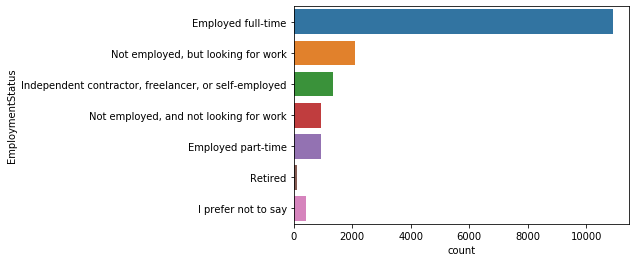

In [27]:
sns.countplot(y= 'EmploymentStatus', data=mcq)

The number of interviewees in Korea: 194


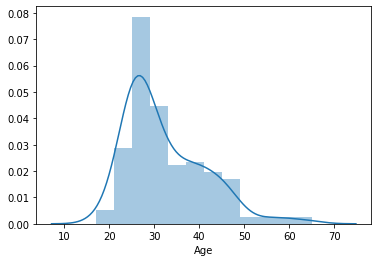

In [29]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
print('The number of interviewees in Korea: '+str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.show()

Text(0.5, 1.0, 'Korean')

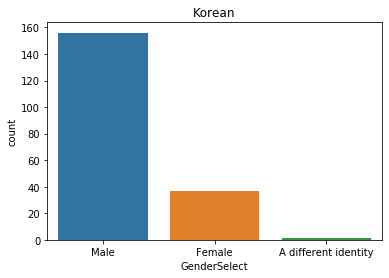

In [31]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

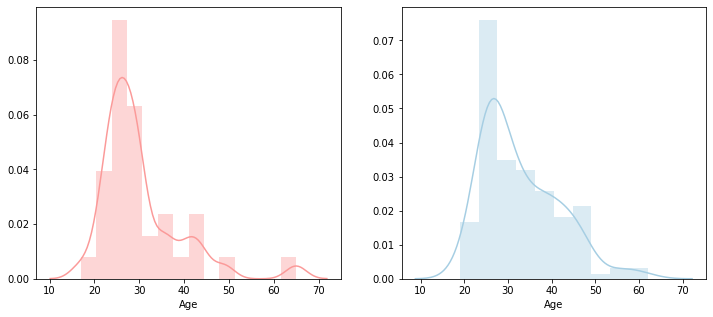

In [37]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color = sns.color_palette("Paired")[4], ax=ax1)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color = sns.color_palette("Paired")[0], ax= ax2)
